In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [3]:
def visualize_t(t_stat, n_control, n_experimental):
    
    """
    Visualize the critical t values on a t distribution
    
    Parameters
    -----------
    t-stat: float
    n_control: int
    n_experiment: int
    
    Returns
    ----------
    None
    
    """
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.ppf to get critical value. For alpha = 0.05 and two tailed test
    crit = stats.t.ppf(1-0.025, (n_control+n_experimental-2))
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(crit, color='black', linestyle='--', lw=5)
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    ax.axvline(t_stat, color='red', linestyle='--', lw=5,label='t-statistic')
    
    plt.legend()
    
    plt.show()
    return None


In [4]:
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [5]:
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom


In [6]:
df = pd.read_csv('reviews.csv')

In [7]:
df

,Unnamed: 0,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,genre,label,content
0,0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,electronic,virgin,"“Trip-hop” eventually became a ’90s punchline,..."
1,1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,metal,hathenter,"Eight years, five albums, and two EPs in, the ..."
2,2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,rock,fashionable idiots,Minneapolis’ Uranium Club seem to revel in bei...
3,3,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,rock,static shock,Minneapolis’ Uranium Club seem to revel in bei...
4,4,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,rock,kill rock stars,Kleenex began with a crash. It transpired one ...
5,5,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,rock,mississippi,Kleenex began with a crash. It transpired one ...
6,6,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,electronic,teklife,It is impossible to consider a given release b...
7,7,22722,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,contributor,2017-01-05,3,5,1,2017,NaN,rca,"In the pilot episode of “Insecure,” the critic..."
8,8,22704,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017,rap,age 101,"Rapper Simbi Ajikawo, who records as Little Si..."
9,9,22694,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017,electronic,stroboscopic artefacts,"For the last thirty years, Israel’s electronic..."


In [8]:
df = df.drop_duplicates(subset = 'reviewid', keep = 'last')

## Comparing Album Reviews between Pop/R&B and Electronic genres

In [9]:
df_pop = df[df['genre'] == 'pop/r&b']

In [10]:
df_electronic = df[df['genre'] == 'electronic']

In [11]:
df_electronic = df_electronic.sample(n=1174)

In [12]:
pop_mean = df_pop['score'].mean() 
pop_count= df_pop['score'].count() 
pop_std= df_pop['score'].std() 

electronic_mean = df_electronic['score'].mean() 
electronic_count = df_electronic['score'].count() 
electronic_std = df_electronic['score'].std() 

In [13]:
pop_mean

6.911073253833052

In [14]:
electronic_mean

7.026490630323674

In [15]:
pop_count

1174

In [16]:
electronic_count 

1174

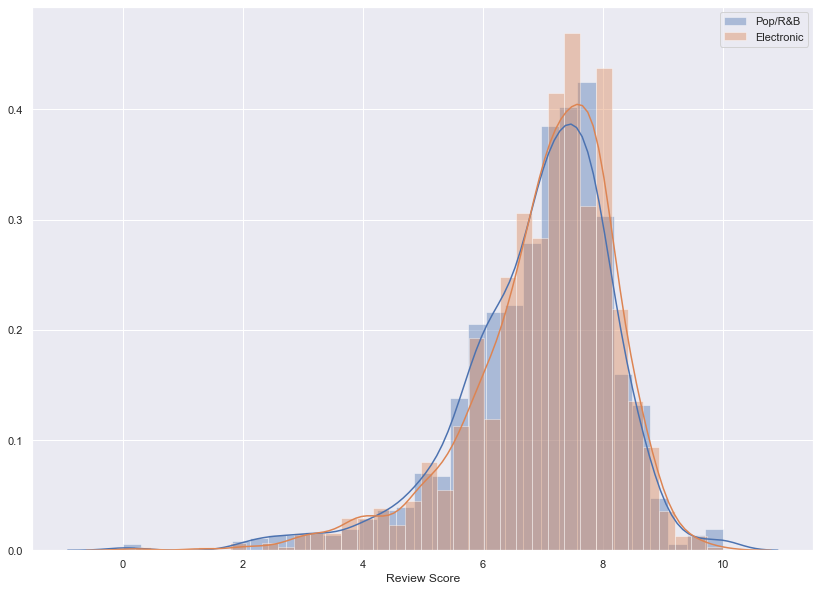

In [17]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,10)})
sns.distplot(df_pop['score'], label = 'Pop/R&B') 
sns.distplot(df_electronic['score'], label = 'Electronic') 

plt.xlabel('Review Score')
plt.legend()
plt.show()

In [18]:
t_stat_genre = twosample_tstatistic(df_pop['score'], df_electronic['score'] )
t_stat_genre

-2.2448839021916696

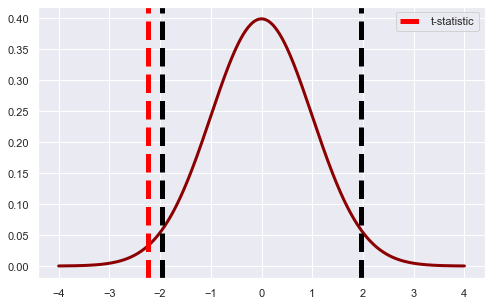

In [19]:
visualize_t(t_stat_genre, len(df_pop['score']), len(df_electronic['score']))

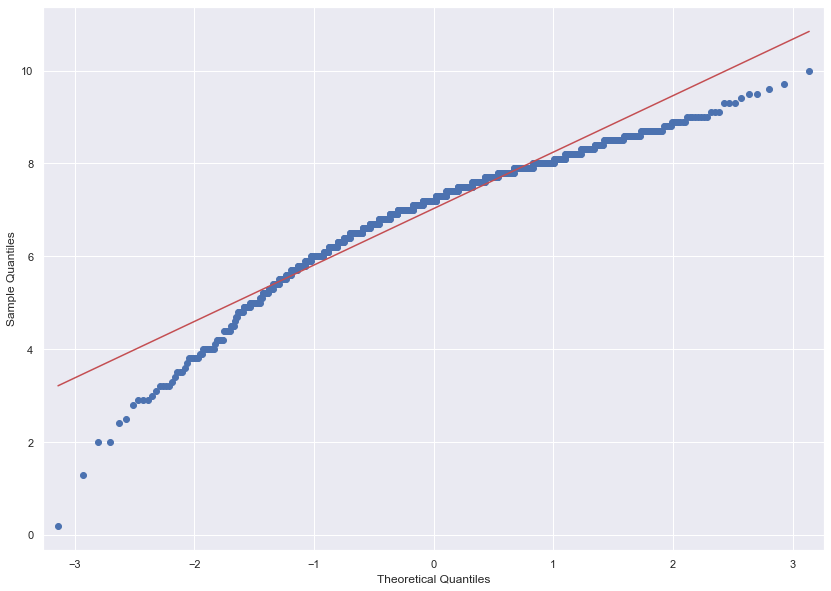

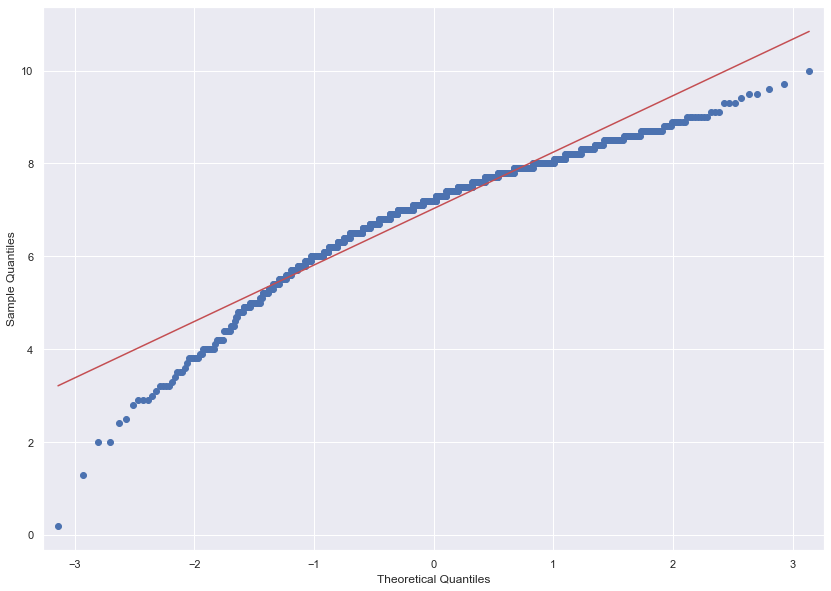

In [20]:
sm.qqplot(df_electronic['score'], line = 's')

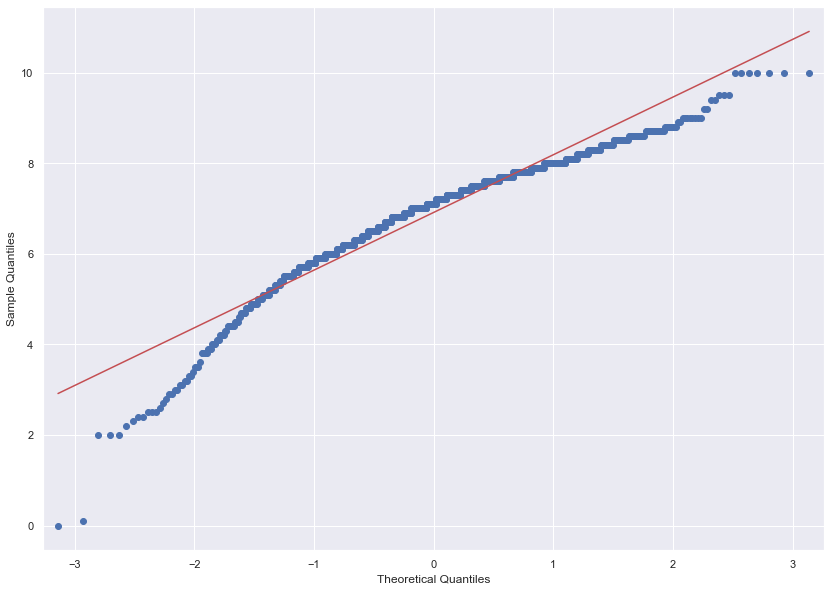

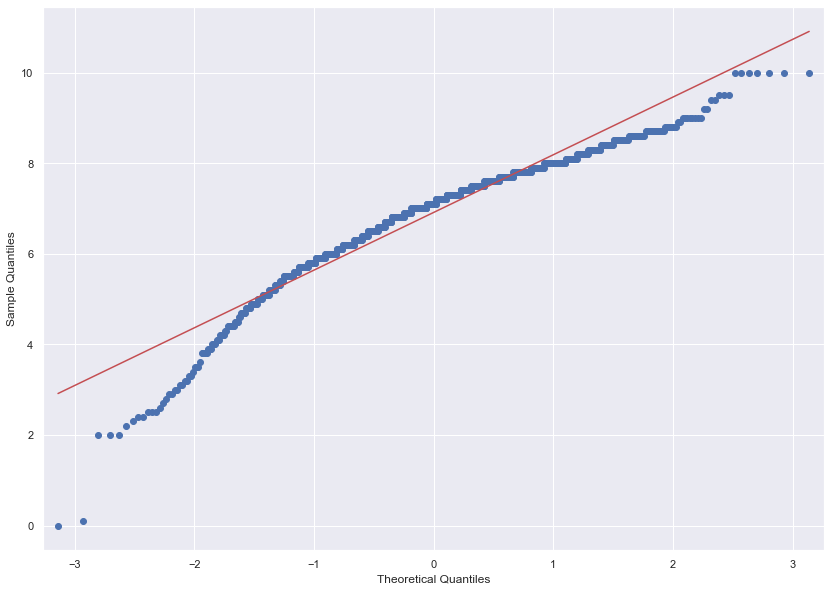

In [21]:
sm.qqplot(df_pop['score'], line = 's')

In [22]:
# independent two sample t test assuming normal distributions
stats.ttest_ind(df_pop['score'], df_electronic['score'], equal_var = False)

Ttest_indResult(statistic=-2.244883902191808, pvalue=0.024868608050846765)

In [23]:
#Wilcoxon Rank Sums test on 2 skewed distributions
stats.ranksums(df_pop['score'], df_electronic['score'])

RanksumsResult(statistic=-2.5732222858445004, pvalue=0.010075647236721844)

In [24]:
# Kolmogorov-Smirnov statistic on 2 samples.
#This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.
stats.ks_2samp(df_pop['score'], df_electronic['score'])

Ks_2sampResult(statistic=0.049403747870528106, pvalue=0.11390417982878062)

## Comparing Album Reviews from the label with the most reviews against all others (Sub Pop vs. all)

In [25]:
df_subpop = df[df['label'] == 'sub pop']
df_thrill = df[df['label'] == 'thrill jockey']


In [26]:
df_label = df.copy()

In [27]:
subpop_mean = df_subpop['score'].mean() 
subpop_count= df_subpop['score'].count() 
subpop_std= df_subpop['score'].std() 

thrill_mean = df_thrill['score'].mean() 
thrill_count = df_thrill['score'].count() 
thrill_std = df_thrill['score'].std() 

In [28]:
df_label.score.count()

18389

In [29]:
subpop_mean 

7.106818181818179

In [30]:
subpop_count

264

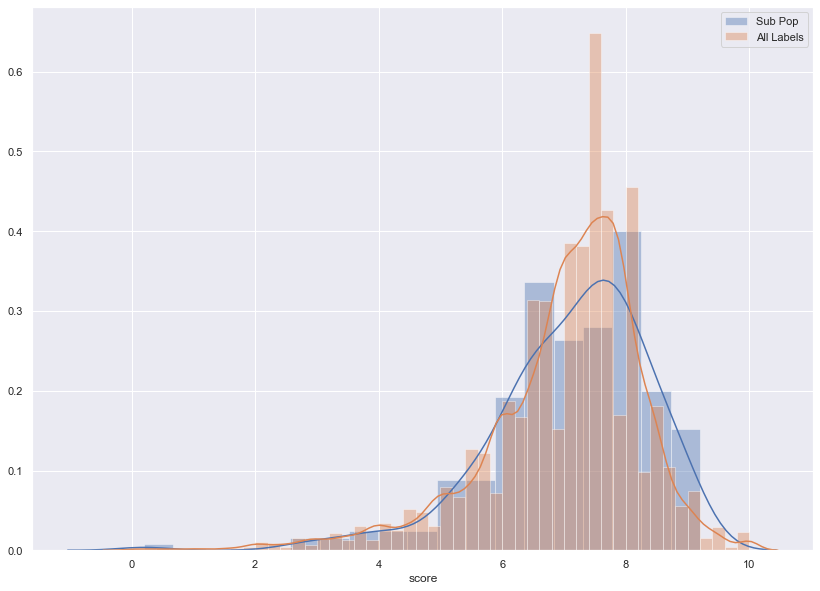

In [31]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,10)})
sns.distplot(df_subpop['score'], label = 'Sub Pop') 
sns.distplot(df_label['score'], label = 'All Labels') 

plt.legend()
plt.show()

### Run two tailed z-test  

In [32]:
def z_stat(x_bar, mu, sigma, n, alpha):
    z = (x_bar - mu)/(sigma/(n**(1/2)))
    
    pval = (1 -(stats.norm.cdf(z)))
    print(f"P Value: {pval}")
    if pval<(alpha/2):
        print("Reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")
    

In [33]:
df_label2 = df_label.copy()
df_label2['sz'] = df_label.groupby(['label'])['score'].transform("size")



In [34]:
df_label2 = df_label2[df_label2['sz']>40]

In [35]:
df_label2['score'].mean()

7.003130730940574

In [36]:
df_label2['score'].std()

1.3418329060250742

In [37]:
df_label2 = df_label2[df_label2['label']!= 'self-released' ]

In [38]:
labels = list(set(list(df_label2['label'])))

In [39]:
z_stat(subpop_mean, df_label.score.mean(), df_label.score.mean(), subpop_count, 0.05)

P Value: 0.4073047354604893
We fail to reject the null hypothesis


In [40]:
df_label

,Unnamed: 0,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,genre,label,content
0,0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,electronic,virgin,"“Trip-hop” eventually became a ’90s punchline,..."
1,1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,metal,hathenter,"Eight years, five albums, and two EPs in, the ..."
3,3,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,rock,static shock,Minneapolis’ Uranium Club seem to revel in bei...
5,5,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,rock,mississippi,Kleenex began with a crash. It transpired one ...
6,6,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,electronic,teklife,It is impossible to consider a given release b...
7,7,22722,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,contributor,2017-01-05,3,5,1,2017,NaN,rca,"In the pilot episode of “Insecure,” the critic..."
8,8,22704,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017,rap,age 101,"Rapper Simbi Ajikawo, who records as Little Si..."
9,9,22694,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017,electronic,stroboscopic artefacts,"For the last thirty years, Israel’s electronic..."
10,10,22714,reflection,brian eno,http://pitchfork.com/reviews/albums/22714-refl...,7.7,0,andy beta,contributor,2017-01-04,2,4,1,2017,experimental,warp,Ambient music is a funny thing. As innocuous a...
11,11,22724,filthy america its beautiful,the lox,http://pitchfork.com/reviews/albums/22724-filt...,5.3,0,ian cohen,contributor,2017-01-04,2,4,1,2017,rap,roc nation,There were innumerable cameos at the Bad Boy F...


In [41]:
df[df['label'] == 'fat possum']

,Unnamed: 0,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,genre,label,content
240,240,22562,goodbye terrible youth,american wrestlers,http://pitchfork.com/reviews/albums/22562-good...,7.1,0,brian burlage,NaN,2016-11-01,1,1,11,2016,rock,fat possum,"From 1999 to 2013, the American Wrestlers fron..."
457,457,22309,pearls to swine,adam torres,http://pitchfork.com/reviews/albums/22309-pear...,7.5,0,ryan leas,NaN,2016-09-12,0,12,9,2016,folk/country,fat possum,There’s a degree of would-be myth to Adam Torr...
561,561,22228,crappin you negative,the grifters,http://pitchfork.com/reviews/albums/22228-crap...,7.9,0,stuart berman,contributor,2016-08-19,4,19,8,2016,rock,fat possum,Ever since Jeff Buckley was claimed by the Mis...
828,828,21884,a youthful dream,yung,http://pitchfork.com/reviews/albums/21884-a-yo...,6.5,0,ian cohen,contributor,2016-06-18,5,18,6,2016,rock,fat possum,"At the turn of the decade, the youthful dream ..."
914,914,21943,minor victories,minor victories,http://pitchfork.com/reviews/albums/21943-mino...,6.0,0,evan rytlewski,contributor,2016-05-31,1,31,5,2016,rock,fat possum,Minor Victories have wisely shied away from bi...
987,987,21859,get gone,seratones,http://pitchfork.com/reviews/albums/21859-get-...,6.8,0,allison hussey,contributor,2016-05-12,3,12,5,2016,rock,fat possum,Seratones would be just another pretty-good-no...
1087,1087,21714,blood visions,jay reatard,http://pitchfork.com/reviews/albums/21714-bloo...,9.1,1,evan minsker,deputy news editor,2016-04-22,4,22,4,2016,rock,fat possum,Jay Reatard’s reputation was to smash disco ba...
1458,1458,21471,human ceremony,sunflower bean,http://pitchfork.com/reviews/albums/21471-huma...,6.9,0,pat healy,contributor,2016-01-29,4,29,1,2016,rock,fat possum,Being a teenager is all about testing out diff...
1910,1910,21047,savage hills ballroom,youth lagoon,http://pitchfork.com/reviews/albums/21047-sava...,7.2,0,ian cohen,contributor,2015-09-17,3,17,9,2015,rock,fat possum,Youth Lagoon's first two albums felt introspec...
2540,2540,20285,american wrestlers,american wrestlers,http://pitchfork.com/reviews/albums/20285-amer...,6.9,0,ian cohen,contributor,2015-04-06,0,6,4,2015,rock,fat possum,Using a drum machine to replicate a live backi...


In [42]:
def calculate_z(df, alpha):
    sig_labels = []
    pop_mean = df.score.mean()
    pop_std = df.score.std()
    
    print(f"Population Mean: {pop_mean}")
    print(f"Population Standard Deviation: {pop_std} \n")
    for label in labels:
        
        data = df[df['label'] == label]
        mean = data['score'].mean() 
        count = data['score'].count() 
        std= data['score'].std() 
        
        print(f"Label: {label}")
        print(f"Number of Albums: {count}")
        print(f"Mean Score: {mean}")
        print(f"Standard Deviation: {std}")
        
        z = (mean - pop_mean)/(pop_std/(count**(1/2)))
    
        pval = (1 -(stats.norm.cdf(z)))
        print(f"P Value: {pval}")
        
        if pval<(alpha/2):
            sig_labels.append(label)
            print("Reject the null hypothesis")
        else:
            print("We fail to reject the null hypothesis")
            
        
        print('\n')
        print('---')
        
    return sig_labels     

In [45]:
sig_label = calculate_z(df_label, 0.05)
#calculate_z(df_label, 0.05)

Population Mean: 7.00571537332096
Population Standard Deviation: 1.2937583236754802 

Label: sacred bones
Number of Albums: 71
Mean Score: 7.214084507042252
Standard Deviation: 0.7424468763387119
P Value: 0.08737593382688869
We fail to reject the null hypothesis


---
Label: asthmatic kitty
Number of Albums: 66
Mean Score: 7.03030303030303
Standard Deviation: 0.9406985451853069
P Value: 0.43864876604371206
We fail to reject the null hypothesis


---
Label: profound lore
Number of Albums: 58
Mean Score: 7.61896551724138
Standard Deviation: 0.6742004742595731
P Value: 0.00015314120797305097
Reject the null hypothesis


---
Label: kompakt
Number of Albums: 80
Mean Score: 7.15375
Standard Deviation: 1.052897599213893
P Value: 0.15305395775820374
We fail to reject the null hypothesis


---
Label: ninja tune
Number of Albums: 86
Mean Score: 6.961627906976747
Standard Deviation: 1.2089050568131927
P Value: 0.6240054085876179
We fail to reject the null hypothesis


---
Label: ghostly
Number of

---
Label: island
Number of Albums: 66
Mean Score: 6.424242424242425
Standard Deviation: 1.977182191212893
P Value: 0.9998695453345062
We fail to reject the null hypothesis


---


In [46]:
sig_label

['profound lore',
 'drag city',
 'numero group',
 'hyperdub',
 'legacy',
 'light in the attic',
 'emi',
 'relapse',
 'jagjaguwar',
 '4ad',
 'kranky',
 'rhino',
 'matador',
 'merge',
 'domino']

In [47]:
df_sig_label = df.loc[df['label'].isin(sig_label)]

In [50]:
df_sig_label.groupby('label').mean()

,Unnamed: 0,reviewid,score,best_new_music,pub_weekday,pub_day,pub_month,pub_year
label,,,,,,,,
4ad,10698.718182,13645.354545,7.317273,0.236364,1.854545,15.281818,6.463636,2009.581818
domino,10438.153846,13705.292308,7.334359,0.164103,1.892308,15.138462,6.158974,2009.815385
drag city,12556.346457,12415.259843,7.172047,0.051181,1.992126,17.708661,5.850394,2008.429134
emi,12762.563380,11464.478873,7.673239,0.154930,2.211268,15.169014,7.788732,2008.253521
hyperdub,5146.534884,18273.302326,7.455814,0.162791,2.162791,14.534884,7.697674,2012.976744
jagjaguwar,12996.460993,11923.602837,7.234043,0.085106,1.957447,14.836879,5.652482,2008.276596
kranky,13081.185841,11860.982301,7.341593,0.106195,1.911504,16.486726,6.000000,2008.132743
legacy,8622.395833,15584.125000,7.789583,0.229167,2.270833,16.104167,6.562500,2010.937500
light in the attic,7000.535714,16949.017857,7.883929,0.196429,1.803571,16.053571,6.267857,2011.964286


In [59]:
df_sig_label.groupby(['label', 'genre']).count()

Unnamed: 0  reviewid  title  artist  url  \
label              genre                                                    
4ad                electronic             8         8      8       8    8   
                   experimental           4         4      4       4    4   
                   folk/country           1         1      1       1    1   
                   pop/r&b                9         9      9       9    9   
                   rap                    1         1      1       1    1   
                   rock                  77        77     77      77   77   
domino             electronic            29        29     29      29   29   
                   folk/country           7         7      7       7    7   
                   jazz                   2         2      2       2    2   
                   pop/r&b               18        18     18      18   18   
                   rap                    1         1      1       1    1   
                   rock                 133       133    133     133  133   
drag city          experimental          20        20     20      20   20   
                   folk/country          27        27     27      27   27   
                   global                 2         2      2       2    2   
                   metal                  7         7      7       7    7   
                   pop/r&b                6         6      6       6    6   
                   rock                 142       142    142     142  142   
emi                electronic             5         5      5       5    5   
                   experimental           1         1      1       1    1   
                   jazz                   1         1      1       1    1   
                   pop/r&b                6         6      6       6    6   
                   rap                    4         4      4       4    4   
                   rock                  53        53     53      53   53   
hyperdub           electronic            16        16     16      16   16   
                   experimental           9         9      9       9    9   
                   pop/r&b                5         5      5       5    5   
                   rap                    2         2      2       2    2   
                   rock                   3         3      3       3    3   
jagjaguwar         folk/country           7         7      7       7    7   
...                                     ...       ...    ...     ...  ...   
light in the attic rock                  17        17     17      17   17   
matador            electronic            10        10     10      10   10   
                   experimental           5         5      5       5    5   
                   folk/country           2         2      2       2    2   
                   metal                  5         5      5       5    5   
                   pop/r&b                1         1      1       1    1   
                   rap                    2         2      2       2    2   
                   rock                 156       156    156     156  156   
merge              electronic             2         2      2       2    2   
                   folk/country           7         7      7       7    7   
                   jazz                   1         1      1       1    1   
                   pop/r&b                8         8      8       8    8   
                   rock                 210       210    210     210  210   
numero group       experimental           1         1      1       1    1   
                   folk/country           1         1      1       1    1   
                   metal                  1         1      1       1    1   
                   pop/r&b                3         3      3       3    3   
                   rock                   9         9      9       9    9   
profound lore      experimental           2         2      2       2    2   
                   metal     

In [52]:
drag_city = df.loc[df['label']== 'drag city']   
drag_city['genre'].value_counts()

rock            142
folk/country     27
experimental     20
metal             7
pop/r&b           6
global            2
Name: genre, dtype: int64

In [53]:
pop_mean = df.score.mean()
pop_std = df.score.std()
print(f"Population Mean: {pop_mean}")
print(f"Population Standard Deviation: {pop_std} \n")

for label in sig_label:
    df_new = df[df['label'] == label]
    mean = df_new['score'].mean() 
    count = df_new['score'].count() 
    std= df_new['score'].std()   
    max_ = df_new['score'].max() 
    min_ =df_new['score'].min() 
    genre = df_new['genre'].value_counts()
    
    
    
    print(f"Label: {label}\n")
    print(f"Number of Albums: {count}")
    print(f"Mean Score: {mean}")
    print(f"Standard Deviation: {std}")
    print(f"Highest Review: {max_}")
    print(f"Lowest Review: {min_}\n")
    print(f"Genres: {genre}")
    
    print('\n')
    print('---')  

Population Mean: 7.00571537332096
Population Standard Deviation: 1.2937583236754802 

Label: profound lore

Number of Albums: 58
Mean Score: 7.61896551724138
Standard Deviation: 0.6742004742595731
Highest Review: 8.6
Lowest Review: 5.5

Genres: metal           23
rock            11
experimental     2
rap              1
Name: genre, dtype: int64


---
Label: drag city

Number of Albums: 254
Mean Score: 7.17204724409449
Standard Deviation: 1.0984925629255082
Highest Review: 9.4
Lowest Review: 2.4

Genres: rock            142
folk/country     27
experimental     20
metal             7
pop/r&b           6
global            2
Name: genre, dtype: int64


---
Label: numero group

Number of Albums: 60
Mean Score: 7.878333333333333
Standard Deviation: 0.665898568818707
Highest Review: 9.1
Lowest Review: 6.0

Genres: rock            9
pop/r&b         3
folk/country    1
metal           1
experimental    1
Name: genre, dtype: int64


---
Label: hyperdub

Number of Albums: 43
Mean Score: 7.4558139

In [ ]:
bin_cols = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

#Looking the V's features
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 2) # The grid of chart
plt.figure(figsize=(16,20)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(df_train[bin_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=df_train, hue='target', palette='hls') 
    ax.set_ylabel('Count', fontsize=15) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
    ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 
    ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights
    
plt.show()